# **Music Recommendation System**



## **Final Submission**
Alvita Yathati

## Executive Summary

  The project proposes the User-Based Filtering w/Hyperparameters because of the F_1 score, this is a major indicator of how accurate the predictions for the said model will be. One of the important findings was the identification of patterns in user listening behavior, which allowed the model to leverage these patterns for effective song recommendations. Data preprocessing played a crucial role in enhancing model performance.After completing two individual recommendation systems I realized that the most appropriate model depends on the data that is provided. No one model works for every recommendation system. Various techniques range from a simple model to a more complex and layered one. The most appropriate model is determined through what can provide the most accurate prediction rating and this varies based on the business ask.

## Problem and Solution Summary

The goal was to develop a music recommendation system that could personalize song suggestions for users, based on their past listening habits. This personalization is key for increasing user engagement and satisfaction on a music streaming platform like Spotify. Since Spotify’s success largely depends on keeping users engaged, delivering content that resonates with individual preferences is essential. To deal with this challenge, User-Based Collaborative Filtering (UBCF) was used, which focuses on finding users with similar music tastes by analyzing their listening history. By using Pearson Baseline Similarity to gauge these similarities, the system can recommend songs that people with similar interests have enjoyed, making the listening experience more personalized and enjoyable for each user.

## Recommendation for Implementation

As i mentioned above most appropriate model depends on the data that is provided. No one model works for every recommendation system. Various techniques range from a simple model to a more complex and layered one. The most appropriate model is determined through what can provide the most accurate prediction rating and this varies based on the business ask.

Keeping this and the selected model in mind, i would recommend Regularly updating the model with new user interaction data to ensure it remains accurate and relevant. Also, Additional data may include genre, mood tags, and producer credits. Adding these aspects into models will help clarify a more direct recommendation without adding too much noise. Mood tags can help group songs into themes and finding out at what times of the day a user listens to a specific mood can enhance recommendations. Producers tend to write a similar style of songs thus producer credits can recommend more songs not by artist popularity but by producer popularity.

Key stakeholders, including the technical team, product management, and data science teams, will need to work together to ensure the success of this implementation. The technical team should focus on integrating the model efficiently, ensuring it can scale to handle Spotify’s extensive user base and large volume of songs. Product management should ensure that the recommendation outputs align with Spotify’s business objectives, such as promoting new or less mainstream artists to diversify the user experience. The data science team should monitor the model’s performance, making necessary adjustments based on user feedback and emerging trends.

The benefits of this implementation include increased user engagement, higher satisfaction, and improved retention rates, all of which contribute to Spotify’s revenue.

Potential risks include the cold start problem, where new users or songs with little interaction data may not receive accurate recommendations.

Further analysis is recommended to explore hybrid models that combine collaborative filtering with content-based approaches to mitigate these challenges. Additionally, A/B testing should be conducted to assess the impact of the recommendations on user engagement and identify opportunities for further refinement.









## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

# To do label encoding
from sklearn.preprocessing import LabelEncoder

### **Load the dataset**

In [3]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Capstone Project/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Capstone Project/song_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
# See top 10 records of count_df data
# Top 10 records based on play_count column
count_df.sort_values(by=['play_count'], ascending=False).head(10)

,Unnamed: 0,user_id,song_id,play_count
1228366,1228366,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213
1048310,1048310,50996bbabb6f7857bf0c8019435b5246a0e45cfd,SOUAGPQ12A8AE47B3A,920
1586780,1586780,5ea608df0357ec4fda191cb9316fe8e6e65e3777,SOKOSPK12A8C13C088,879
31179,31179,bb85bb79612e5373ac714fcd4469cabeb5ed94e1,SOZQSVB12A8C13C271,796
1875121,1875121,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOBONKR12A58A7A7E0,683
1644909,1644909,70caceccaa745b6f7bc2898a154538eb1ada4d5a,SOPREHY12AB01815F9,676
1731945,1731945,972cce803aa7beceaa7d0039e4c7c0ff097e4d55,SOJRFWQ12AB0183582,664
1374693,1374693,d2232ac7a1ec17b283b5dff243161902b2cb706c,SOLGIWB12A58A77A05,649
1819571,1819571,f5363481018dc87e8b06f9451e99804610a594fa,SOVRIPE12A6D4FEA19,605
515442,515442,f1bdbb9fb7399b402a09fa124210dedf78e76034,SOZPMJT12AAF3B40D1,585


In [5]:
# See 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [6]:
# Testing
song_df.groupby(['song_id']).count().sum()

,0
title,999983
release,999993
artist_name,1000000
year,1000000


In [7]:
# See top 10 records of song_df data
top = song_df['song_id'].value_counts()
top.head(10)

,count
song_id,
SOXHYWX12A8C142CE8,3
SONMIKP12A58A7E1FF,3
SOQNMCD12A8C1383D4,3
SOZHPEI12A8C138502,3
SOKBIIQ12AB017FEFC,3
SOODBWM12A6D4F6B0E,3
SODIYLM12AB017F8BB,3
SORBGBD12A8C141CEA,3
SOEHQBQ12A6D4F9EA9,3


In [8]:
# See top 10 artists of song_df data
top_a = song_df['artist_name'].value_counts()
top_a.head(10)

,count
artist_name,
Michael Jackson,194
Johnny Cash,193
Beastie Boys,187
Joan Baez,181
Neil Diamond,176
Duran Duran,175
Franz Ferdinand,173
Aerosmith,173
Radiohead,173


### **Let us check the data types and and missing values of each column**

In [9]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [10]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**

*   Currently there are two different data sets (song_df and count_df)
*   song_df contains data related to songs such as release year, artist, album, etc.
*   count_df contains data related to the users such as user id, and play_count
*   Both datasets have a song_id column
*   Both datasets have object and int data types
*   It appears that within song_df there is some missing data regarding title and release

In [11]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
#df = count_df.merge(song_df.drop_duplicates(['song_id']), how="left", on="song_id")
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
df.head()
# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'], axis=1)

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [12]:
# Label Encoding
le = LabelEncoder()

# Fit transform the user_id column
df['user_id'] = le.fit_transform(df['user_id'])

# Fit transform the business_id column
df['business_id'] = le.fit_transform(df['song_id'])

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [13]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [14]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():

    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [15]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [16]:
# We want our song to be listened by at least 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [17]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year,business_id
200,6958,SOBDVAK12AC90759A2,1,Daisy And Prudence,Distillation,Erin McKeown,2000,447
202,6958,SOBIMTY12A6D4F931F,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,512
203,6958,SOBKRVG12A8C133269,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,549
204,6958,SOBUBLL12A58A795A8,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,703
205,6958,SOBVKFF12A8C137A79,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,719


In [18]:
# Drop records with play_count more than(>) 5
df_final.drop(df_final[df_final['play_count']>5].index, inplace=True)
#df_final.drop(df_final.index[df_final['play_count'] > 5], inplace = True)

# Get names of indexes for which column play_count more than(>) 5
indexNames = df_final[ df_final['play_count']==5 ].index
# Delete these row indexes from dataFrame
test = df_final.drop(indexNames , inplace=True)

In [19]:
# Check the shape of the pre narrowed down dataset to compare to the narrowed down df_final
df.shape

(438390, 8)

In [20]:
# Check the shape of the narrowed down data
df_final.shape

(113011, 8)

## **Exploratory Data Analysis**

### **Checking the total number of unique users, songs, artists in the data**

Total number of unique user id

In [21]:
# Display total number of unique user_id
print("Total number of unique user_ids:", df_final.user_id.nunique())

Total number of unique user_ids: 3154


Total number of unique song id

In [22]:
# Display total number of unique song_id
print("Total number of unique song_ids:", df_final.song_id.nunique())

Total number of unique song_ids: 563


Total number of unique artists

In [23]:
# Display total number of unique artists
print("Total number of unique artists:",df_final.artist_name.nunique())

Total number of unique artists: 232


#### **Observations and Insights:**


*   The total number of unique users are 3154
*   The total number of unique songs are 563
*   The total number of Unique artists are 232
*   After narrowing down the dataset to df_final we can see that the dataset went from 438390 rows and 8 columns to 113011 rows and 8 columns
*   To narrow the data only users who have listened to 90 or more songs were kept int the df_final dataset. Any song that had not been listened to at least 120 times was also removed.

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [24]:
# Finding the most played songs in the dataset
df_final['song_id'].value_counts().head(10)

,count
song_id,
SOWCKVR12A8C142411,720
SOAXGDH12A8C13F8A1,697
SOFRQTD12A81C233C0,660
SOCVTLJ12A6310F0FD,638
SOKLRPJ12A8C13C3FE,616
SOPQLBY12A6310E992,591
SOLFXKT12AB017E3E0,563
SOPXKYD12A6D4FA876,562
SONYKOW12AB01849C9,555


In [25]:
# See top 10 artists of df_final data
df_final['artist_name'].value_counts().head()

,count
artist_name,
Coldplay,5136
The Killers,4039
Florence + The Machine,2773
Kings Of Leon,2756
the bird and the bee,2361


In [26]:
# Display some songs by the most popular artist_name
df_final.loc[df_final['artist_name'] == 'Coldplay']

,user_id,song_id,play_count,title,release,artist_name,year,business_id
396,27018,SOCVTLJ12A6310F0FD,2,Clocks,A Rush Of Blood To The Head,Coldplay,2002,1118
428,27018,SOEWTBE12A58A7E7C2,2,Strawberry Swing,Viva La Vida - Prospekt's March Edition,Coldplay,2008,1907
433,27018,SOFBOXR12A6310F0FC,2,God Put A Smile Upon Your Face,A Rush Of Blood To The Head,Coldplay,2002,1983
439,27018,SOFPZCI12A58A7CF79,2,Brothers & Sisters,Trouble (B-Side),Coldplay,1999,2187
473,27018,SOICNON12A8C140437,2,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008,3232
...,...,...,...,...,...,...,...,...
1994217,30647,SOWEJXA12A6701C574,2,Fix You,X & Y,Coldplay,2005,8612
1995068,9570,SOCVTLJ12A6310F0FD,3,Clocks,A Rush Of Blood To The Head,Coldplay,2002,1118
1995179,9570,SOKLRPJ12A8C13C3FE,1,The Scientist,The Scientist,Coldplay,2002,4152
1995272,9570,SOPXKYD12A6D4FA876,4,Yellow,Yellow,Coldplay,2000,6293


Most interacted users

In [27]:
# Finding the most played songs in the dataset
df_final['user_id'].value_counts().head(10)

,count
user_id,
61472,240
15733,222
37049,198
9570,176
10763,174
26616,173
9097,172
65994,169
23337,166


In [28]:
df_final.to_csv(r'/content/drive/MyDrive/Capstone Project/final_data.csv', index=False)

#### **Observations and Insights:**


*   The most intereacted song id is SOWCKVR12A8C142411 being played 751 times
*   The most interacted user id is 61472






Songs released on a yearly basis


In [29]:
count_songs = song_df.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace = True)
count.tail()

,title
year,
2007,39414
2008,34770
2009,31051
2010,9397
2011,1


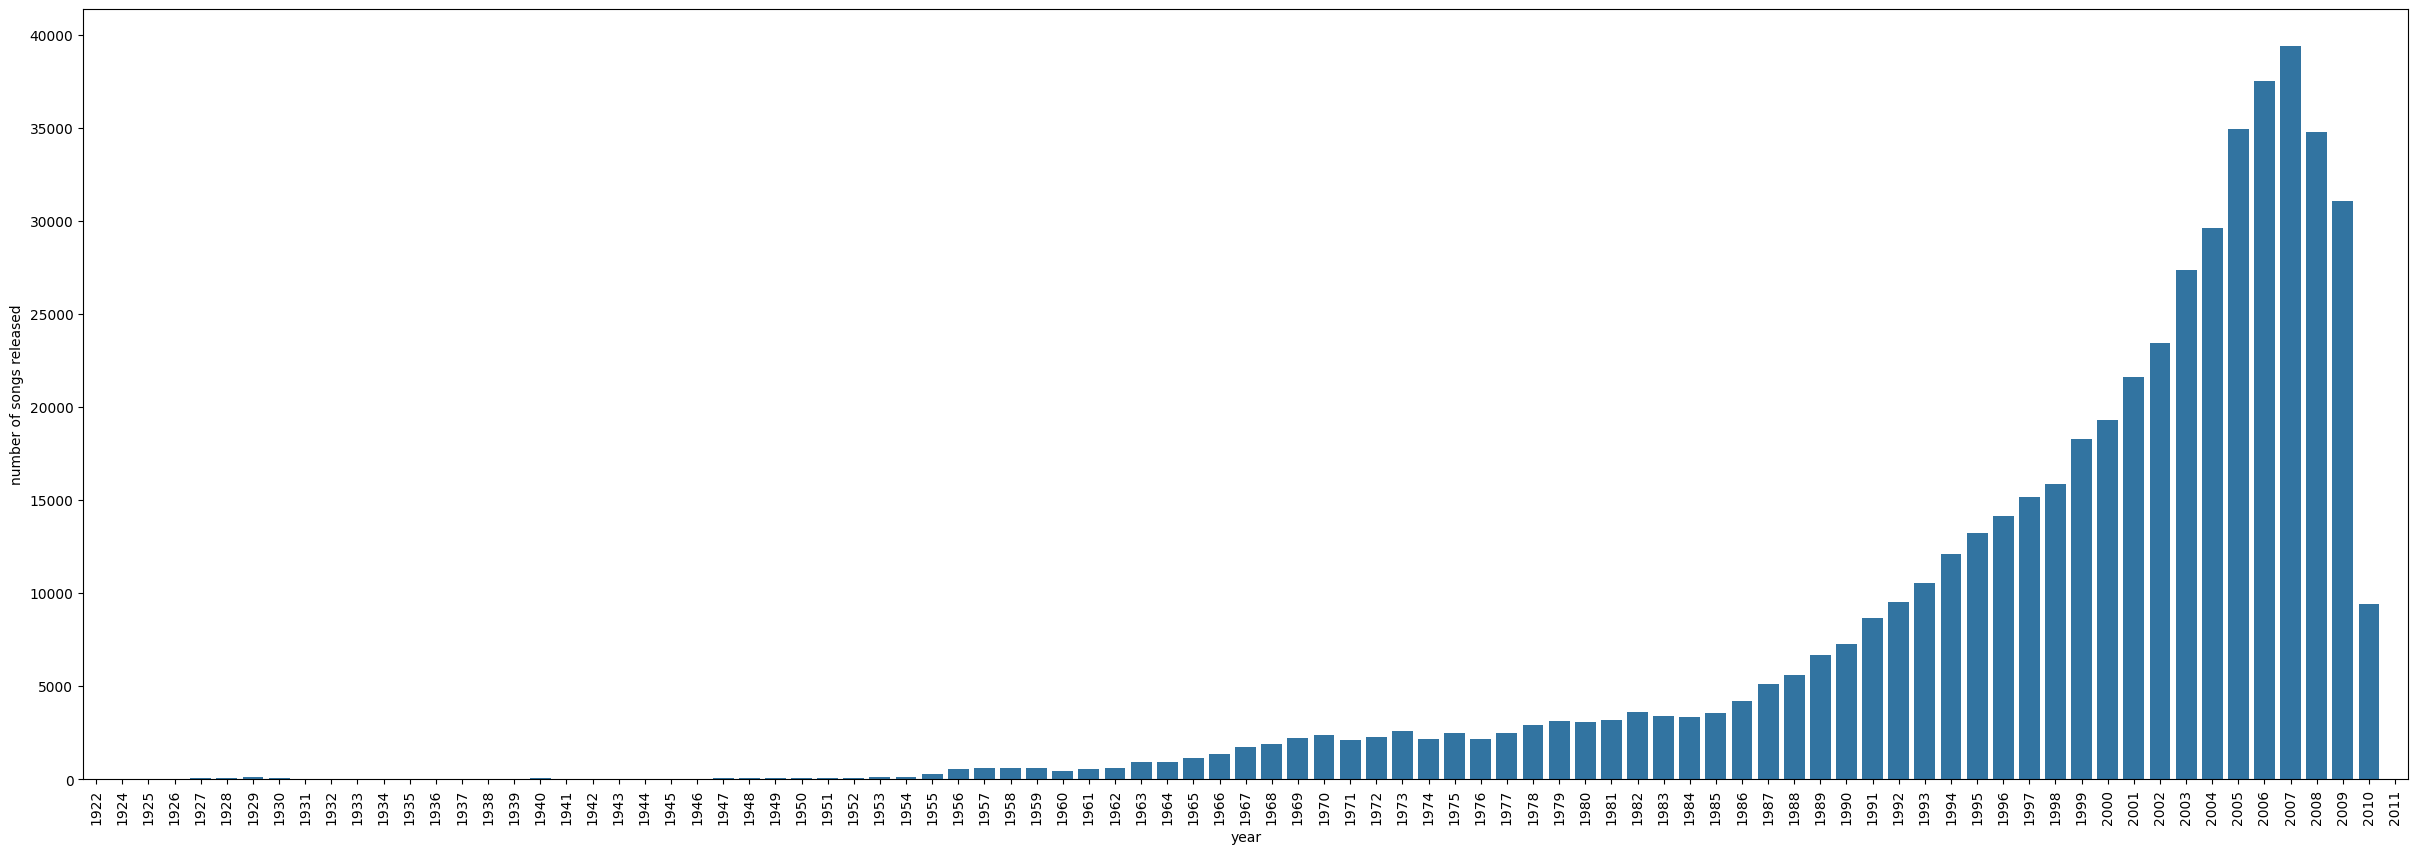

In [30]:
plt.figure(figsize = (30,10))
ax = sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median,)
for item in ax.get_xticklabels(): item.set_rotation(90)
plt.ylabel('number of songs released')
# Show the plot
plt.show()

#### **Observations and Insights:**

*   The year with the most amount of song played is 2007 with 39414 counted songs
*   There is a correlation between the more popular songs with the year they came out.
*   You can see a significant increase in songs listened to per year starting around 2000. This indicates the users who are listening to music are listening to more recent music compared to music that came out prior to 2000
*   It would be interesting to see the user_ids age, I believe the reason there is a spike starting around 2000 might be because users who are more familir with technology are younger and more tech savy compared to older generations. Threfore, the users are more likely to listen to recent music compared music released in older years.

**Think About It:** What other insights can be drawn using exploratory data analysis?

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [31]:

# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()      # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].count()         # Hint: Use groupby function on the song_id column

In [32]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
SOABJBU12A8C13F63F,1.517510,257
SOABJTC12A58A7DE0E,1.382812,128
SOADJQJ12A8C141D38,1.689904,416
SOADQPP12A67020C82,1.639640,111
SOAFQGA12A8C1367FA,1.389381,113


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [33]:
# Build the function to find top n songs

def top_n_products(final_play, n, min_interaction):

    # Finding products with minimum number of interactions
    recommendations = final_play[final_play['play_freq'] > min_interaction]

    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    return recommendations.index[:n]

In [34]:
# Recommend top 10 songs using the function defined above
list(top_n_products(final_play, 10, 50))

['SONYKOW12AB01849C9',
 'SOFRQTD12A81C233C0',
 'SOAXGDH12A8C13F8A1',
 'SOOGNOZ12AAF3B2936',
 'SODJWHY12A8C142CCE',
 'SOKUPAO12AB018D576',
 'SOLFXKT12AB017E3E0',
 'SOTWNDJ12A8C143984',
 'SOQAJHW12AB0186004',
 'SOWCKVR12A8C142411']

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [35]:
# Install the surprise package using pip.
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357274 sha256=3414bbaa0af8df81eeaf3715601477521e6a81be6ab13a191c1ecbac3427a71a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [36]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [37]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

In [38]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

**Think About It:** How changing the test size would change the results and outputs?

In [39]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(random_state=1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8511
Precision:  0.39
Recall:  0.456
F_1 score:  0.42


💡 **Observations and Insights:**


*   F_1 score is 0.42 meaning this model could be a lot better in predicting methods
*   RMSE is 0.8511 also indicating that this model has lots of room for imporovement
*   The precision is 0.39 meaning that out of 30 recommended items 0.39 were relevant to the user
*   The recall is 0.456 meaning that out of 30 relevant products 0.456 are recommended



In [40]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict('6958', '1671', r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.56   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.5575022859333982, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [41]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict('6958', '3232', verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.5575022859333982, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})


💡 **Observations and Insights:**

*    Per the initial prediction of user 6958 and song 1671 the recommendation r_ui is 2 while my model predicted 1.56 which proves observations above that the model is not as efficient as it could be.

*   Per the second predictor r_ui is unknown as the song 3232 has not been listened to by user, the model predicted a 1.56 reccomendation rating


Now, let's try to tune the model and see if we can improve the model performance.

In [42]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.838540649961056
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [43]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True,
               'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k =30 , min_k =6, random_state = 1, verbose = True)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8441
Precision:  0.399
Recall:  0.617
F_1 score:  0.485


💡 **Observations and Insights:**

*   f_1 score went from 0.42 to 0.485 after optimization of hyperparameters
*   After implmeenting hyperparameters precision and recall both incresed meaning that tuning the model increased efficienciy in the model
*   Tuning the model increased model performance
*   RMSE	0.8441
*   Precision	0.399
*   Recall	0.617




In [44]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.56   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.5575022859333982, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [45]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict("6958", "3232", verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.5575022859333982, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

💡 **Observations and Insights:**

*    Per the initial prediction of user 6958 and song 1671 the recommendation r_ui is 2 while my model predicted 1.56  

*   Per the second predictor r_ui is unknown as the song 3232 has not been listened to by user, the model predicted a 1.56 reccomendation rating similiar to the user to user model prior to tuning



**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [46]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k = 5)

[981, 452, 715, 1475, 155]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [47]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [48]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [49]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,SONHWUN12AC468C014,2.703015
1,SOIMQAK12A67ADE98C,2.619559
2,SOTSHYT12A8C142868,2.594006
3,SONQCXC12A6D4F6A37,2.512075
4,SOQFEDG12AB018DD24,2.343612


💡 **Observations and Insights:**


*    After adding input paramaters I was able to compute a list of song_ids with their predicted ratings
*   This is still using a user-user, so this is comparing data from similiar users listened to songs and provided recommendations based on this

### Correcting the play_counts and Ranking the above songs

In [50]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

  return ranked_songs
  print()

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [51]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
1,SONHWUN12AC468C014,197,2.703015,2.631768
2,SOIMQAK12A67ADE98C,143,2.619559,2.535935
4,SOTSHYT12A8C142868,102,2.594006,2.494992
0,SONQCXC12A6D4F6A37,198,2.512075,2.441008
3,SOQFEDG12AB018DD24,109,2.343612,2.247830


💡 **Observations and Insights:**

*   Predicted ratings in this model are higher than the actual rating
*   As you notice song _id SONHWUN12AC468C014 is played roughly 197 times with a predicted rating of 2.70 and actual rating of 2.63




### Item Item Similarity-based collaborative filtering recommendation systems

In [52]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = True)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8278
Precision:  0.255
Recall:  0.456
F_1 score:  0.327


💡 **Observations and Insights:**

*   Root mean square error (RMSE) is 0.8278 meaning our algorithm worked but could be better.
*   The precision is 0.255 meaning that out of the recommended items 0.255 were relevant to the user.
*   The recall is 0.456 meaning that out of the relevant products 0.456 products are recommended.
*  With an F_1 score of 0.327 which is representative of both recall and precision.
*  Based on the F_1 score this model is not great

In [53]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict("6958", "1671", r_ui =2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.56   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.5575022859333982, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [54]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict("6958", "3232",  verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.5575022859333982, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

💡 **Observations and Insights:**

*    The predicted rate compared to r_ui is 1..56 this is the same predicted rate as song_id 3232 for the same user  

In [55]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8220255500038721
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': False, 'min_support': 4}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [56]:
# Apply the best modle found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'cosine', 'user_based': False, 'min_support':4}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, k =30 , min_k =6, random_state = 1, verbose = True)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8269
Precision:  0.33
Recall:  0.547
F_1 score:  0.412


💡 **Observations and Insights:**


*   Root mean square error (RMSE) is 0.8269
*   The precision is 0.33 meaning that out of the recommended items 0.33 were relevant to the user.
*   The recall is 0.547 meaning that out of the relevant products 0.547 products are recommended.
*  With an F_1 score of 0.412 which is representative of both recall and precision.

In [57]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict("6958", "1671", verbose = True)

user: 6958       item: 1671       r_ui = None   est = 1.56   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=None, est=1.5575022859333982, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [58]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.5575022859333982, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [59]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[181, 389, 479, 522, 511]

In [60]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [61]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,SOABJBU12A8C13F63F,1.557502
1,SOADQPP12A67020C82,1.557502
2,SOAIAAT12A8C145D49,1.557502
3,SOAIILB12A58A776F7,1.557502
4,SOAJAFJ12A58A7B75A,1.557502


In [62]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,SOABJBU12A8C13F63F,257,1.557502,1.495124
1,SOAIILB12A58A776F7,117,1.557502,1.465052
2,SOADQPP12A67020C82,111,1.557502,1.462586
3,SOAIAAT12A8C145D49,102,1.557502,1.458488
4,SOAJAFJ12A58A7B75A,101,1.557502,1.457999


💡 **Observations and Insights:**

*    The larger the frequency the smaller gap between predicted and corrected ratings
*    There are not significant outliers between predicted and corrected ratings



### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [63]:
# Build baseline model using svd
# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 0.8234
Precision:  0.374
Recall:  0.524
F_1 score:  0.436


In [64]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict("6958", 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.56   {'was_impossible': False}


Prediction(uid='6958', iid=1671, r_ui=2, est=1.5575022859333982, details={'was_impossible': False})

In [65]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict("6958", 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid='6958', iid=3232, r_ui=None, est=1.5575022859333982, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [66]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8135747598494508
{'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [67]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs= 30, lr_all= 0.005, reg_all= 0.2, random_state=1)

# Train the algorithm on the trainset
svd_optimized=svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)


RMSE: 0.8149
Precision:  0.354
Recall:  0.509
F_1 score:  0.418


💡 **Observations and Insights:**

*   Root mean square error (RMSE) is 0.8149
*   The precision is 0.354
*   The recall is 0.509
*  With an F_1 score of 0.418 which is representative of both recall and precision.

In [68]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict('6958', 1671, verbose=True)

user: 6958       item: 1671       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid='6958', iid=1671, r_ui=None, est=1.5575022859333982, details={'was_impossible': False})

In [69]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict("6958", 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid='6958', iid=3232, r_ui=None, est=1.5575022859333982, details={'was_impossible': False})

💡 **Observations and Insights:**

*    Estimated rating prediction is the same for both song_ids

In [70]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized )

In [71]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,SOAXGDH12A8C13F8A1,697,1.653400,1.615522
3,SONYKOW12AB01849C9,555,1.638181,1.595733
1,SOFRQTD12A81C233C0,660,1.627135,1.588211
2,SOLFXKT12AB017E3E0,563,1.565562,1.523417
4,SODJWHY12A8C142CCE,528,1.564276,1.520757


💡 **Observations and Insights:**

*   The closest predicted rating compared to corrected rating song_id is SOZVVRE12A8C143150
*   The larger the frequency the smaller gap between predicted and corrected ratings
*   It would be interesting to see if we were able to calculate a confidence interval or score on the predicted ratings



### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [72]:
# Make baseline clustering model
# Using Co-Clustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the trainset
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 0.8419
Precision:  0.352
Recall:  0.493
F_1 score:  0.411


In [73]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict('6958', 1671, verbose = True)

user: 6958       item: 1671       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid='6958', iid=1671, r_ui=None, est=1.5575022859333982, details={'was_impossible': False})

In [74]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict('6958', 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid='6958', iid=3232, r_ui=None, est=1.5575022859333982, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [75]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8515208526753192
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [76]:
# Train the tuned Coclustering algorithm
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5,n_cltr_i = 7, n_epochs = 10, random_state = 1)

# Training the algorithm on the trainset
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_tuned)


RMSE: 0.8609
Precision:  0.353
Recall:  0.478
F_1 score:  0.406


💡 **Observations and Insights:**

*   Root mean square error (RMSE) is 0.8609
*   The precision is 0.353 meaning that out of the recommended items 0.353 were relevant to the user.
*   The recall is 0.478 meaning that out of the relevant products 0.478 products are recommended.
*  With an F_1 score of 0.406 which is representative of both recall and precision.

In [77]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, verbose = True)

user: 6958       item: 1671       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=None, est=1.5575022859333982, details={'was_impossible': False})

In [78]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5575022859333982, details={'was_impossible': False})

💡 **Observations and Insights:**

*    Estimated rating prediction is the same for both song_ids

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [79]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended restaurants ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those restaurants ids which the user_id has not interacted yet
    non_interacted_restaurants = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the restaurants ids which user_id has not interacted yet
    for item_id in non_interacted_restaurants:

        # Predicting the ratings for those non interacted restaurants ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    # Returing top n highest predicted rating restaurants for this user
    return recommendations[:top_n]

In [80]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [81]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,SOLFXKT12AB017E3E0,563,1.894433,1.852288
4,SOOGNOZ12AAF3B2936,95,1.867696,1.765098
1,SODJWHY12A8C142CCE,528,1.792237,1.748718
2,SOBONKR12A58A7A7E0,321,1.727110,1.671296
3,SOODSPH12AB01819C3,119,1.691770,1.600100


💡 **Observations and Insights:**


*    The highest predicted rating is 1.89 which is close to the corrected rating of 1.85

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [82]:
df_small = df_final

In [83]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

In [84]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()


,user_id,song_id,play_count,release,artist_name,year,business_id,text
title,,,,,,,,
Daisy And Prudence,6958,SOBDVAK12AC90759A2,1,Distillation,Erin McKeown,2000,447,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,SOBIMTY12A6D4F931F,1,Sawdust,The Killers,2004,512,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,SOBKRVG12A8C133269,1,Vampire Weekend,Vampire Weekend,2007,549,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,SOBUBLL12A58A795A8,1,Tiny Vipers,Tiny Vipers,2007,703,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,SOBVKFF12A8C137A79,1,You Know I'm No Good,Amy Winehouse,2007,719,Monkey Man You Know I'm No Good Amy Winehouse


In [85]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

,title
0,Daisy And Prudence
1,The Ballad of Michael Valentine
2,I Stand Corrected (Album)
3,They Might Follow You
4,Monkey Man


In [86]:
# Importing necessary packages to work with text data
import nltk
nltk.download('omw-1.4')

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [87]:
# Function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words('english')]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems


In [88]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [89]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [90]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [91]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[498, 216, 470, 327, 380, 377, 376, 375, 378, 379]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Cassius (album version)',
 'My Night With the Prostitute From Marseille',
 'No Cars Go',
 'Jenny Was A Friend Of Mine',
 'Marshall Examines His Carcass']

## **Conclusion and Recommendations:**



  |           | User-Based Filtering                   | Item-Based Filtering                   | Matrix Factorization                   | Cluster-Based Model                   |
| --------- | -------------------------------------- | -------------------------------------- | -------------------------------------- | ------------------------------------- |
| RMSE      | 0.8511                                 | 0.8278                                 | 0.8234                                 | 0.8419                                |
| Precision | 0.39                                  | 0.255                                  | 0.374                                   | 0.352                                 |
| Recall    | 0.456                                  | 0.456                                  | 0.524                                  | 0.493                                 |
| F_1 score | 0.42                                  | 0.327                                  | 0.436                                  | 0.411                                 |
|           | User-Based Filtering w/Hyperparameters | Item-Based Filtering w/Hyperparameters | Matrix Factorization w/Hyperparameters | Cluster-Based Model w/Hyperparameters |
| RMSE      | 0.8441                                 | 0.8269                                | 0.8149                             | 0.8609                                |
| Precision | 0.399                                  | 0.33                                   | 0.354                              | 0.353                                 |
| Recall    | 0.617                              | 0.547                                  | 0.509                                  | 0.478                                 |
| F_1 score | 0.485                                  | 0.412                                  | 0.418                                  | 0.406                                 |


**What are the most meaningful insights from the data relevant to the
problem?**

-   After completing two individual recommendation systems I realized
    that the most appropriate model depends on the data that is
    provided. No one model works for every recommendation system.
    The most appropriate model is determined through what
    can provide the most accurate prediction rating and this varies
    based on the business ask.

-   Item to Item filtering models with and without hyperparameters have
    the largest discrepancies between F_1 score values. This indicates
    that tuning the model can make a significant impact on your model
    performance. Matrix factorization considers the user to item
    filtering, this allows for a more personalized recommendation system
    that is strictly based on past behaviors of the user. It was the second highest F_1 Score.
    

**Comparison of various techniques and their relative performance:**

**How do different techniques perform?**

-   Item Based Filter was the least efficient model, realistically this
    makes sense. Item to Item modeling was filtered on song_id and
    recommended similar songs according to the data. To make the item filtering more efficient we would want to follow a cluster-based modeling on a grouping such as a genre. Item-to-item-based filtering with and
    without tuning did lead to Improved results but not promising. Per the reference chart above it was the worst-performing model based on the F_1 score. Matrix factorization led to the second-highest scores compared to other models.

**Which one is performing better?­­­**

-   User to User w/Hyperparameters has indicated the highest F_1 score
    compared to all the filtering models with a 0.485 score. Tuning
    improved the F_1 score considerably and contains the highest recall rate.

**Is there scope to improve the performance further?**

-   To improve the performance there are additional data points that I
    would like to help organize the data. Additional data may include
    genre, mood tags, producer_credits . Adding these aspects into
    models will help clarify a more direct recommendation without adding too much noise. Mood tags can help group songs into themes .
    Producers tend to write a similar style of songs thus producer credits can recommend more songs not by artist popularity but by producer popularity.

**Proposal for the final solution design:**

**What model do you propose to be adopted? Why is this the best solution
to adopt?**

-   I propose User-Based Filtering w/Hyperparameters because of the F_1
    score, this is a major indicator of how accurate the predictions for the said model will be.



